
***Required libraries***
<br><br><br><br>


If you don't have Python on your computer, you can use the Anaconda Python distribution to install most of the Python packages you need. Anaconda provides a simple double-click installer for your convenience.
<br><br>
This notebook uses several Python packages that come standard with the Anaconda Python distribution. The primary libraries that we'll be using are:
<br><br>
- NumPy: Provides a fast numerical array structure and helper functions.
- pandas: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
- scikit-learn: The essential Machine Learning package in Python.
- matplotlib: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
- Seaborn: Advanced statistical plotting library.

<br><br>

**Checking the data**

<br><br>
The next step is to look at the data we're working with. Even curated data sets from the government can have errors in them, and it's vital that we spot these errors before investing too much time in our analysis.
<br><br>
Generally, we're looking to answer the following questions:
<br><br>
Is there anything wrong with the data?
Are there any quirks with the data?
Do I need to fix or remove any of the data?
Let's start by reading the data into a pandas DataFrame.
<br><br>

In [1]:
import pandas as pd
iris_data = pd.read_csv('i.csv')
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<br><br>
The first row in the data file defines the column headers, and the headers are descriptive enough for us to understand what each column represents. The headers even give us the units that the measurements were recorded in, just in case we needed to know at a later point in the project.
<br><br>
Each row following the first row represents an entry for a flower: four measurements and one class, which tells us the species of the flower.
<br><br>
One of the first things we should look for is missing data. Thankfully, the field researchers already told us that they put a 'NA' into the spreadsheet when they were missing a measurement.
<br><br>
We can tell pandas to automatically identify missing values if it knows our missing value marker.<br><br>

In [2]:
iris_data = pd.read_csv('i.csv', na_values=['NA'])


In [3]:
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,100.000000,100.000000,100.000000,100.00000
mean,5.914000,3.041000,3.851000,1.21300
std,0.856469,0.439489,1.785378,0.74558
min,4.300000,2.000000,1.000000,0.10000
25%,5.175000,2.800000,1.600000,0.37500
50%,5.850000,3.000000,4.500000,1.40000
75%,6.500000,3.300000,5.100000,1.80000
max,7.900000,4.400000,6.900000,2.50000


<br><br>We can see several useful values from this table. For example, we see that five petal_width_cm entries are missing.
<br><br>
If you ask me, though, tables like this are rarely useful unless we know that our data should fall in a particular range. It's usually better to visualize the data in some way. Visualization makes outliers and errors immediately stand out, whereas they might go unnoticed in a large table of numbers.
<br><br>
Since we know we're going to be plotting in this section, let's set up the notebook so we can plot inside of it.<br><br>

In [4]:
import matplotlib.pyplot as plt
import seaborn as sb
sb.pairplot(iris_data.dropna(), hue='class')
;

''

<br><br>Next, let's create a scatterplot matrix. **Scatterplot matrices** plot the distribution of each column along the diagonal, and then plot a scatterplot matrix for the combination of each variable. They make for an efficient tool to look for errors in our data.
<br><br>
We can even have the plotting package color each entry by its class to look for trends within the classes.<br><br>

In [5]:
iris_data.loc[iris_data['class'] == 'versicolor', 'class'] = 'Iris-versicolor'
iris_data.loc[iris_data['class'] == 'Iris-setossa', 'class'] = 'Iris-setosa'

iris_data['class'].unique()

array(['setosa', 'Iris-versicolor', 'virginica'], dtype=object)

''

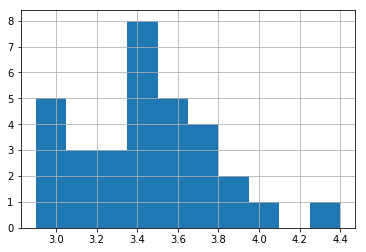

In [6]:
iris_data = iris_data.loc[(iris_data['class'] != 'Iris-setosa') | (iris_data['sepal_width_cm'] >= 3.0)]
iris_data.loc[iris_data['class'] == 'setosa', 'sepal_width_cm'].hist()
;


In [7]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') & (iris_data['sepal_length_cm'] > 1.0)] #Issue

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
32,7.0,3.2,4.7,1.4,Iris-versicolor
33,6.4,3.2,4.5,1.5,Iris-versicolor
34,6.9,3.1,4.9,1.5,Iris-versicolor
35,5.5,2.3,4.0,1.3,Iris-versicolor
36,6.5,2.8,4.6,1.5,Iris-versicolor
37,5.7,2.8,4.5,1.3,Iris-versicolor
38,6.3,3.3,4.7,1.6,Iris-versicolor
39,4.9,2.4,3.3,1.0,Iris-versicolor
40,6.6,2.9,4.6,1.3,Iris-versicolor
41,5.2,2.7,3.9,1.4,Iris-versicolor


''

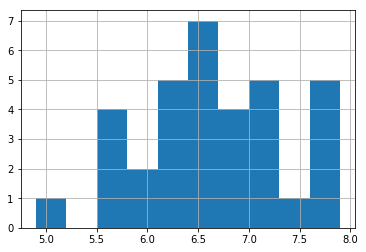

In [8]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') &
              (iris_data['sepal_length_cm'] < 1.0),
              'sepal_length_cm'] *= 100.0

iris_data.loc[iris_data['class'] == 'virginica', 'sepal_length_cm'].hist()
;

In [9]:
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
              (iris_data['sepal_width_cm'].isnull()) |
              (iris_data['petal_length_cm'].isnull()) |
              (iris_data['petal_width_cm'].isnull())]


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


''

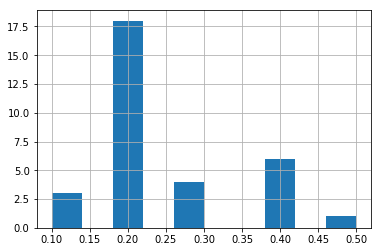

In [10]:
iris_data.loc[iris_data['class'] == 'setosa', 'petal_width_cm'].hist()
;

In [11]:
average_petal_width = iris_data.loc[iris_data['class'] == 'setosa', 'petal_width_cm'].mean()
iris_data.loc[(iris_data['class'] == 'setosa') &
              (iris_data['petal_width_cm'].isnull()),
              'petal_width_cm'] = average_petal_width

iris_data.loc[(iris_data['class'] == 'Iris-setosa') &
              (iris_data['petal_width_cm'] == average_petal_width)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


In [12]:
iris_data.to_csv('iris-data-clean.csv', index=False)

iris_data_clean = pd.read_csv('iris-data-clean.csv')


''

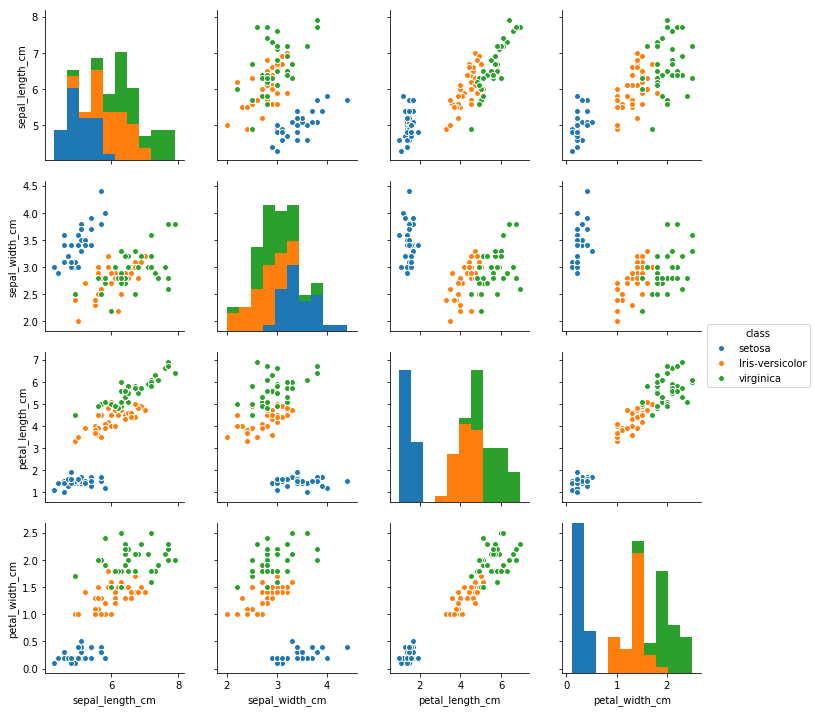

In [13]:
sb.pairplot(iris_data_clean, hue='class')
;

<br><br>From the scatterplot matrix, we can already see some issues with the data set:
<br><br>
There are five classes when there should only be three, meaning there were some coding errors.
<br>
There are some clear outliers in the measurements that may be erroneous: one sepal_width_cm entry for Iris-setosa falls well outside its normal range, and several sepal_length_cm entries for Iris-versicolor are near-zero for some reason.
<br>
We had to drop those rows with missing values.
<br><br>
In all of these cases, we need to figure out what to do with the erroneous data. Which takes us to the next step...
<br>
<br>**Tidying the data**
<br><br>
Now that we've identified several errors in the data set, we need to fix them before we proceed with the analysis.
<br>
Let's walk through the issues one-by-one.
<br>
There are five classes when there should only be three, meaning there were some coding errors.
<br>
After talking with the field researchers, it sounds like one of them forgot to add Iris- before their Iris-versicolor entries. The other extraneous class, Iris-setossa, was simply a typo that they forgot to fix.
<br>
Let's use the DataFrame to fix these errors.<br><br>

In [14]:
assert len(iris_data_clean['class'].unique()) == 3


<br><br>Much better! Now we only have three class types. Imagine how embarrassing it would've been to create a model that used the wrong classes.
<br><br>
There are some clear outliers in the measurements that may be erroneous: one sepal_width_cm entry for Iris-setosa falls well outside its normal range, and several sepal_length_cm entries for Iris-versicolor are near-zero for some reason.
<br><br>
Fixing outliers can be tricky business. It's rarely clear whether the outlier was caused by measurement error, recording the data in improper units, or if the outlier is a real anomaly. For that reason, we should be judicious when working with outliers: if we decide to exclude any data, we need to make sure to document what data we excluded and provide solid reasoning for excluding that data. (i.e., "This data didn't fit my hypothesis" will not stand peer review.)
<br><br>
In the case of the one anomalous entry for Iris-setosa, let's say our field researchers know that it's impossible for Iris-setosa to have a sepal width below 2.5 cm. Clearly this entry was made in error, and we're better off just scrapping the entry than spending hours finding out what happened.<br><br>

In [15]:
assert iris_data_clean.loc[iris_data_clean['class'] == 'Iris-versicolor', 'sepal_length_cm'].min() >= 2.5


<br><br>Excellent! Now all of our Iris-setosa rows have a sepal width greater than 2.5.
<br>
The next data issue to address is the several near-zero sepal lengths for the Iris-versicolor rows. Let's take a look at those rows<br><br>

In [16]:
# We know that our data set should have no missing measurements
assert len(iris_data_clean.loc[(iris_data_clean['sepal_length_cm'].isnull()) |
                               (iris_data_clean['sepal_width_cm'].isnull()) |
                               (iris_data_clean['petal_length_cm'].isnull()) |
                               (iris_data_clean['petal_width_cm'].isnull())]) == 0


''

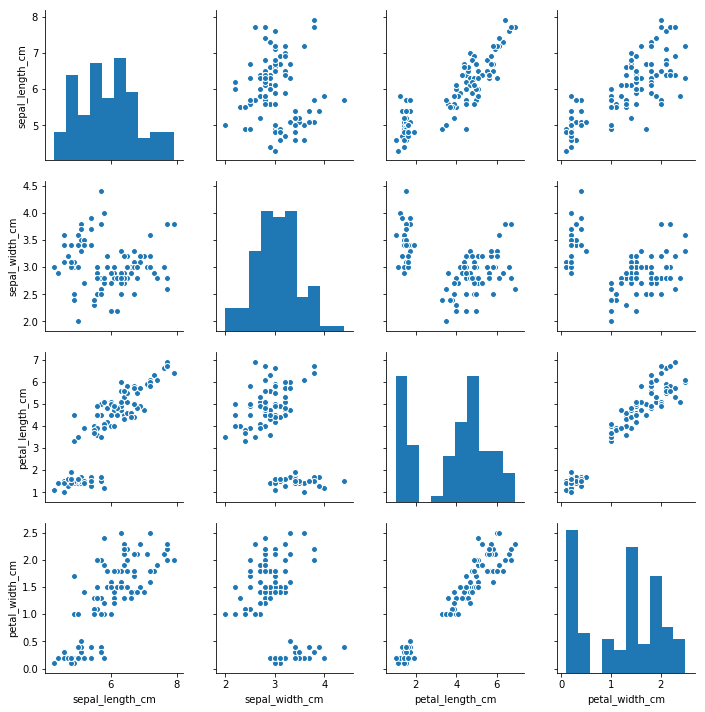

In [17]:

sb.pairplot(iris_data_clean)
;

<br><br>Our data is normally distributed for the most part, which is great news if we plan on using any modeling methods that assume the data is normally distributed.
<br><br>
There's something strange going on with the petal measurements. Maybe it's something to do with the different Iris types. Let's color code the data by the class again to see if that clears things up.

''

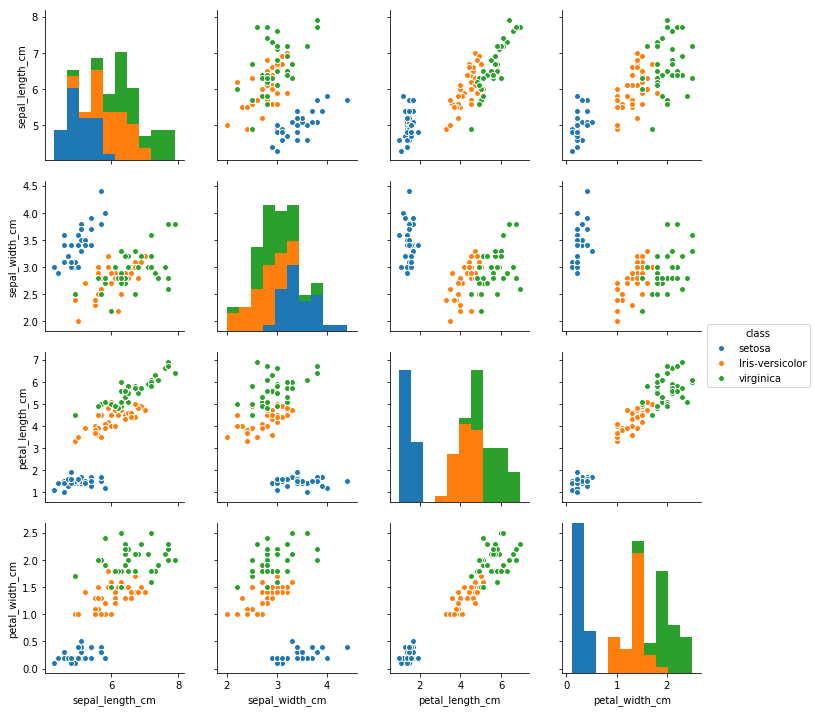

In [18]:
sb.pairplot(iris_data_clean, hue='class')
;

Sure enough, the strange distribution of the petal measurements exist because of the different species. This is actually great news for our classification task since it means that the petal measurements will make it easy to distinguish between Iris-setosa and the other Iris types.
<br><br>
Distinguishing Iris-versicolor and Iris-virginica will prove more difficult given how much their measurements overlap.
<br>
There are also correlations between petal length and petal width, as well as sepal length and sepal width. The field biologists assure us that this is to be expected: Longer flower petals also tend to be wider, and the same applies for sepals.
<br><br>
We can also make violin plots of the data to compare the measurement distributions of the classes. Violin plots contain the same information as box plots, but also scales the box according to the density of the data.

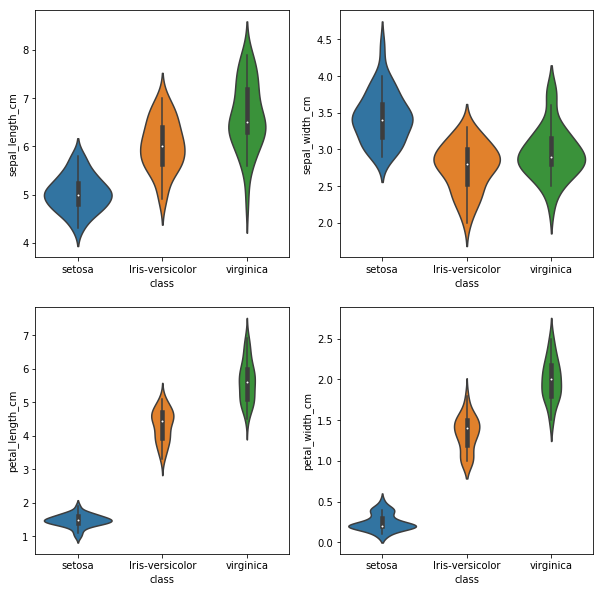

In [19]:
plt.figure(figsize=(10, 10))

for column_index, column in enumerate(iris_data_clean.columns):
    if column == 'class':
        continue
    plt.subplot(2, 2, column_index + 1)
    sb.violinplot(x='class', y=column, data=iris_data_clean)


**Classification**
<br>
Wow, all this work and we still haven't modeled the data!
<br><br>
As tiresome as it can be, tidying and exploring our data is a vital component to any data analysis. If we had jumped straight to the modeling step, we would have created a faulty classification model.
<br><br>
Remember: Bad data leads to bad models. Always check your data first.
<br><br>
Assured that our data is now as clean as we can make it — and armed with some cursory knowledge of the distributions and relationships in our data set — it's time to make the next big step in our analysis: Splitting the data into training and testing sets.
<br><br>
A training set is a random subset of the data that we use to train our models.
<br><br>
A testing set is a random subset of the data (mutually exclusive from the training set) that we use to validate our models on unforseen data.
<br><br>
Especially in sparse data sets like ours, it's easy for models to overfit the data: The model will learn the training set so well that it won't be able to handle most of the cases it's never seen before. This is why it's important for us to build the model with the training set, but score it with the testing set.
<br><br>
Note that once we split the data into a training and testing set, we should treat the testing set like it no longer exists: We cannot use any information from the testing set to build our model or else we're cheating.
<br><br>
Let's set up our data first.

In [20]:
iris_data_clean = pd.read_csv('iris-data-clean.csv')

# We're using all four measurements as inputs
# Note that scikit-learn expects each entry to be a list of values, e.g.,
# [ [val1, val2, val3],
#   [val1, val2, val3],
#   ... ]
# such that our input data set is represented as a list of lists

# We can extract the data in this format from pandas like this:
all_inputs = iris_data_clean[['sepal_length_cm', 'sepal_width_cm',
                             'petal_length_cm', 'petal_width_cm']].values

# Similarly, we can extract the class labels
all_labels = iris_data_clean['class'].values

# Make sure that you don't mix up the order of the entries
# all_inputs[5] inputs should correspond to the class in all_labels[5]

# Here's what a subset of our inputs looks like:
all_inputs[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [21]:
from sklearn.model_selection import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)


Notice how the classifier asks Yes/No questions about the data — whether a certain feature is <= 1.75, for example — so it can differentiate the records. This is the essence of every decision tree.
<br><br>
The nice part about decision tree classifiers is that they are scale-invariant, i.e., the scale of the features does not affect their performance, unlike many Machine Learning models. In other words, it doesn't matter if our features range from 0 to 1 or 0 to 1,000; decision tree classifiers will work with them just the same.
<br><br>
There are several parameters that we can tune for decision tree classifiers, but for now let's use a basic decision tree classifier.

In [22]:
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier on the training set
decision_tree_classifier.fit(training_inputs, training_classes)

# Validate the classifier on the testing set using classification accuracy
decision_tree_classifier.score(testing_inputs, testing_classes)

0.92

''

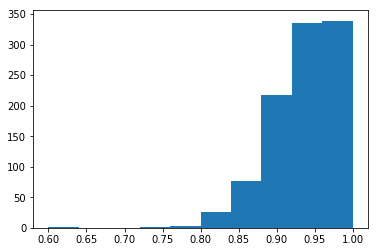

In [23]:
model_accuracies = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)
    
plt.hist(model_accuracies)
;

It's obviously a problem that our model performs quite differently depending on the subset of the data it's trained on. This phenomenon is known as overfitting: The model is learning to classify the training set so well that it doesn't generalize and perform well on data it hasn't seen before.
<br><br>
**Cross-validation**
<br><br>

This problem is the main reason that most data scientists perform k-fold cross-validation on their models: Split the original data set into k subsets, use one of the subsets as the testing set, and the rest of the subsets are used as the training set. This process is then repeated k times such that each subset is used as the testing set exactly once.
<br><br>
10-fold cross-validation is the most common choice, so let's use that here. Performing 10-fold cross-validation on our data set looks something like this:
<br><br>
(each square is an entry in our data set)

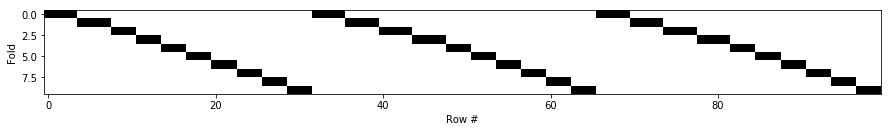

In [24]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

def plot_cv(cv, features, labels):
    masks = []
    for train, test in cv.split(features, labels):
        mask = np.zeros(len(labels), dtype=bool)
        mask[test] = 1
        masks.append(mask)
    
    plt.figure(figsize=(15, 15))
    plt.imshow(masks, interpolation='none', cmap='gray_r')
    plt.ylabel('Fold')
    plt.xlabel('Row #')

plot_cv(StratifiedKFold(n_splits=10), all_inputs, all_labels)


You'll notice that we used Stratified k-fold cross-validation in the code above. Stratified k-fold keeps the class proportions the same across all of the folds, which is vital for maintaining a representative subset of our data set. (e.g., so we don't have 100% Iris setosa entries in one of the folds.)
<br><br>
We can perform 10-fold cross-validation on our model with the following code:

''

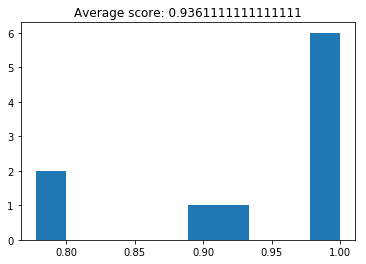

In [25]:
from sklearn.model_selection import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
;

Now we have a much more consistent rating of our classifier's general classification accuracy.
<br><br>
Parameter tuning
<br><br>
Every Machine Learning model comes with a variety of parameters to tune, and these parameters can be vitally important to the performance of our classifier. For example, if we severely limit the depth of our decision tree classifier

''

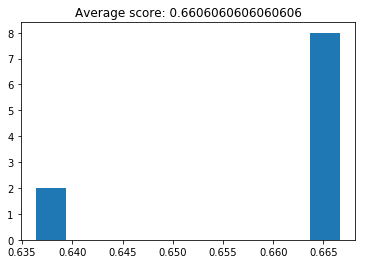

In [26]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=1)

cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
;

the classification accuracy falls tremendously.
<br><br>
Therefore, we need to find a systematic method to discover the best parameters for our model and data set.
<br><br>
The most common method for model parameter tuning is Grid Search. The idea behind Grid Search is simple: explore a range of parameters and find the best-performing parameter combination. Focus your search on the best range of parameters, then repeat this process several times until the best parameters are discovered.
<br><br>
Let's tune our decision tree classifier. We'll stick to only two parameters for now, but it's possible to simultaneously explore dozens of parameters if we want.

In [27]:
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))


Best score: 0.95
Best parameters: {'max_depth': 3, 'max_features': 1}


''

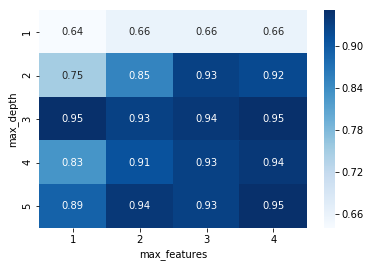

In [28]:
grid_visualization = grid_search.cv_results_['mean_test_score']
grid_visualization.shape = (5, 4)
sb.heatmap(grid_visualization, cmap='Blues', annot=True)
plt.xticks(np.arange(4) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'])
plt.xlabel('max_features')
plt.ylabel('max_depth')
;

Now we have a better sense of the parameter space: We know that we need a max_depth of at least 2 to allow the decision tree to make more than a one-off decision.
<br><br>
max_features doesn't really seem to make a big difference here as long as we have 2 of them, which makes sense since our data set has only 4 features and is relatively easy to classify. (Remember, one of our data set's classes was easily separable from the rest based on a single feature.)
<br><br>
Let's go ahead and use a broad grid search to find the best settings for a handful of parameters.

In [29]:
decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))


Best score: 0.95
Best parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 3, 'splitter': 'best'}


In [30]:
decision_tree_classifier = grid_search.best_estimator_
decision_tree_classifier

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [31]:
import sklearn.tree as tree
from sklearn.externals.six import StringIO

with open('iris_dtc.dot', 'w') as out_file:
    out_file = tree.export_graphviz(decision_tree_classifier, out_file=out_file)


''

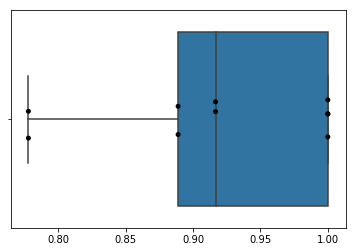

In [32]:
dt_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)

sb.boxplot(dt_scores)
sb.stripplot(dt_scores, jitter=True, color='black')
;

<br><br>_We already know from previous projects that Random Forest classifiers usually work better than individual decision trees. A common problem that decision trees face is that they're prone to overfitting: They complexify to the point that they classify the training set near-perfectly, but fail to generalize to data they have not seen before_.

<br><br>_Random Forest classifiers work around that limitation by creating a whole bunch of decision trees (hence "forest") — each trained on random subsets of training samples (drawn with replacement) and features (drawn without replacement) — and have the decision trees work together to make a more accurate classification_.
<br><br>

_Let that be a lesson for us: Even in Machine Learning, we get better results when we work together_!
<br><br>
_Let's see if a Random Forest classifier works better here_.
<br><br>
_The great part about scikit-learn is that the training, testing, parameter tuning, etc. process is the same for all models, so we only need to plug in the new classifier_<br>

In [33]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()

parameter_grid = {'n_estimators': [10, 25, 50, 100],
                  'criterion': ['gini', 'entropy'],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(random_forest_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

grid_search.best_estimator_


Best score: 0.96
Best parameters: {'criterion': 'gini', 'max_features': 1, 'n_estimators': 10}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

''

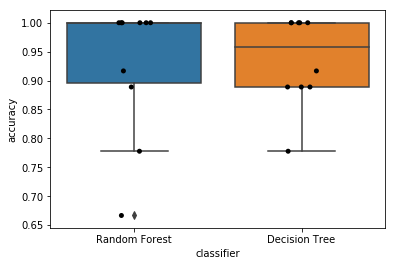

In [34]:
random_forest_classifier = grid_search.best_estimator_

rf_df = pd.DataFrame({'accuracy': cross_val_score(random_forest_classifier, all_inputs, all_labels, cv=10),
                       'classifier': ['Random Forest'] * 10})
dt_df = pd.DataFrame({'accuracy': cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10),
                      'classifier': ['Decision Tree'] * 10})
both_df = rf_df.append(dt_df)

sb.boxplot(x='classifier', y='accuracy', data=both_df)
sb.stripplot(x='classifier', y='accuracy', data=both_df, jitter=True, color='black')
;

In [35]:
%watermark -a 'Rutesh Rathod' -nmv --packages numpy,pandas,sklearn,matplotlib,seaborn


UsageError: Line magic function `%watermark` not found.


In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

# We can jump directly to working with the clean data because we saved our cleaned data set
iris_data_clean = pd.read_csv('iris-data-clean.csv')

# Testing our data: Our analysis will stop here if any of these assertions are wrong

# We know that we should only have three classes
assert len(iris_data_clean['class'].unique()) == 3

# We know that sepal lengths for 'Iris-versicolor' should never be below 2.5 cm
assert iris_data_clean.loc[iris_data_clean['class'] == 'Iris-versicolor', 'sepal_length_cm'].min() >= 2.5

# We know that our data set should have no missing measurements
assert len(iris_data_clean.loc[(iris_data_clean['sepal_length_cm'].isnull()) |
                               (iris_data_clean['sepal_width_cm'].isnull()) |
                               (iris_data_clean['petal_length_cm'].isnull()) |
                               (iris_data_clean['petal_width_cm'].isnull())]) == 0

all_inputs = iris_data_clean[['sepal_length_cm', 'sepal_width_cm',
                             'petal_length_cm', 'petal_width_cm']].values

all_labels = iris_data_clean['class'].values

# This is the classifier that came out of Grid Search
random_forest_classifier = RandomForestClassifier(criterion='gini', max_features=3, n_estimators=50)

# All that's left to do now is plot the cross-validation scores
rf_classifier_scores = cross_val_score(random_forest_classifier, all_inputs, all_labels, cv=10)
sb.boxplot(rf_classifier_scores)
sb.stripplot(rf_classifier_scores, jitter=True, color='black')

# ...and show some of the predictions from the classifier
(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)

random_forest_classifier.fit(training_inputs, training_classes)

for input_features, prediction, actual in zip(testing_inputs[:10],
                                              random_forest_classifier.predict(testing_inputs[:10]),
                                              testing_classes[:10]):
    print('{}\t-->\t{}\t(Actual: {})'.format(input_features, prediction, actual))
